In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from skimage.io import imread, imshow, imsave
from skimage.color import rgb2gray
from skimage.morphology import (erosion, dilation, closing, opening,
                                area_closing, area_opening)
from skimage.measure import label, regionprops, regionprops_table

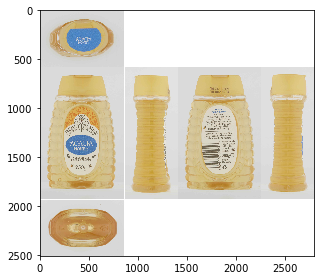

In [3]:
path="E:\Dissertation\Packaging_Project\Images\\7849500_5099440000546_T0.jpg"
painting= imread(path)
imshow(painting)
#path

In [120]:
newname=str(splitcount)+'.jpg'
newname

'1.jpg'

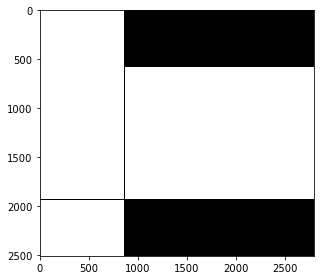

In [32]:
gray_painting = rgb2gray(painting)
binarized = gray_painting<0.95
imshow(binarized)
plt.savefig('binarizedimg.pdf')

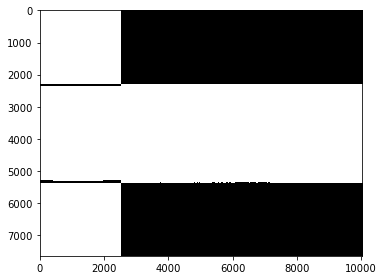

In [10]:
square = np.array([[1,1,1],
                   [1,1,1],
                   [1,1,1]])
def multi_dil(im, num, element=square):
    for i in range(num):
        im = dilation(im, element)
    return im
def multi_ero(im, num, element=square):
    for i in range(num):
        im = erosion(im, element)
    return im
multi_dilated = multi_dil(binarized, 3)
area_closed = area_closing(multi_dilated, 50)
multi_eroded = multi_ero(area_closed, 7)
opened = opening(multi_eroded)
imshow(opened)

C:\ProgramData\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


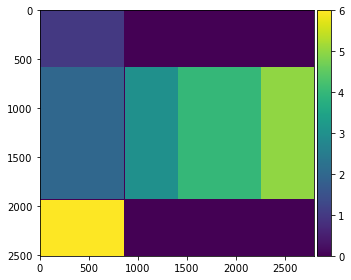

In [35]:
label_im = label(binarized)
regions = regionprops(label_im)
imshow(label_im)

In [15]:
properties = ['area','convex_area','bbox_area', 'extent',  
              'mean_intensity', 'solidity', 'eccentricity', 
              'orientation']
propTable=pd.DataFrame(regionprops_table(label_im, gray_painting, 
             properties=properties))

In [16]:
propTable.sort_values(by=['area'])

,area,convex_area,bbox_area,extent,mean_intensity,solidity,eccentricity,orientation
0,493924,493924,493925,0.999998,0.746402,1.00000,0.742918,-1.570789
5,493925,493925,493925,1.000000,0.734041,1.00000,0.742918,1.570796
2,729108,729531,729532,0.999419,0.785311,0.99942,0.915421,0.000561
4,729532,729532,729532,1.000000,0.786199,1.00000,0.915343,0.000000
3,1134678,1134678,1134678,1.000000,0.773964,1.00000,0.779582,0.000000
1,1156215,1156643,1157073,0.999258,0.766832,0.99963,0.769881,-0.000003


In [17]:
masks = []
bbox = []
list_of_index = []
for num, x in enumerate(regions):
    area = x.area
    convex_area = x.convex_area
    if ((area>100000) and (convex_area/area<1.2) and (convex_area/area>0.95)):
        masks.append(regions[num].convex_image)
        bbox.append(regions[num].bbox)   
        list_of_index.append(num)
count = len(masks)

In [18]:
masks

from skimage.util import img_as_ubyte
oneIMg=bbox[0]
oneIMg[0]
bbox

[(3, 3, 578, 862),
 (581, 3, 1928, 862),
 (581, 865, 1927, 1407),
 (581, 1409, 1927, 2252),
 (581, 2254, 1927, 2796),
 (1930, 3, 2505, 862)]

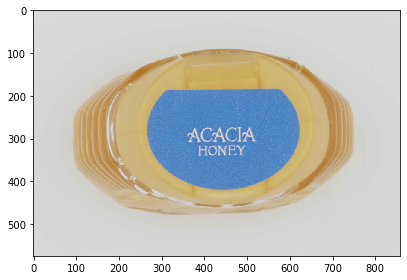

In [19]:

r=((painting[:,:,0])[oneIMg[0]:oneIMg[2],oneIMg[1]:oneIMg[3]]*masks[0])
g=((painting[:,:,1])[oneIMg[0]:oneIMg[2],oneIMg[1]:oneIMg[3]]*masks[0])
b=((painting[:,:,2])[oneIMg[0]:oneIMg[2],oneIMg[1]:oneIMg[3]]*masks[0])
imgt=np.dstack([r,g,b])
imshow(imgt)

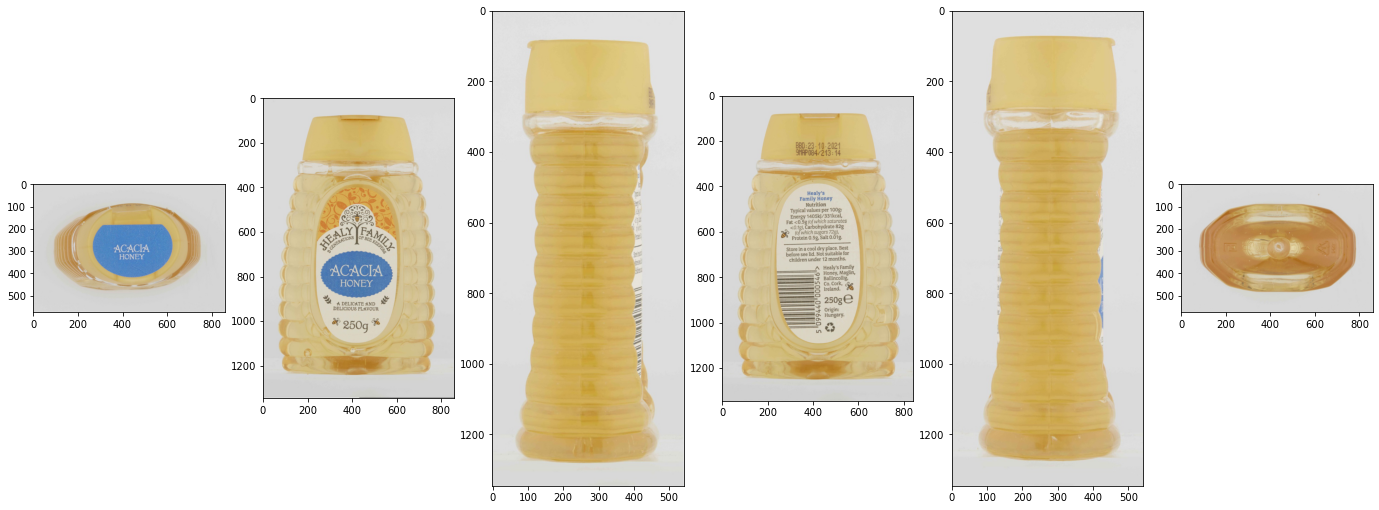

In [40]:
fig, ax = plt.subplots(1, int(count),squeeze=False, figsize=(24,10))
splitcount=20
for axis, box, mask in zip(ax.flatten(), bbox, masks):
    red  =  painting[:,:,0][box[0]:box[2], box[1]:box[3]] * mask
    green = painting[:,:,1][box[0]:box[2], box[1]:box[3]] * mask
    blue  = painting[:,:,2][box[0]:box[2], box[1]:box[3]] * mask
    image = np.dstack([red,green,blue])
    axis.imshow(image)
    #splitcount+=1
    #name1=str(splitcount)+".jpg"
    #print("splitcount:",splitcount)
    #imsave(name1,image)
#plt.savefig('splitImage.pdf')

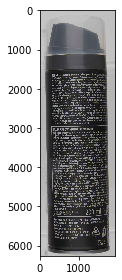

In [146]:
imshow(np.dstack([red,green,blue]))

ValueError: Image RGB array must be uint8 or floating point; found int32

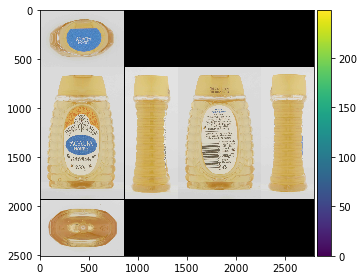

In [38]:
rgb_mask = np.zeros_like(label_im)
for x in list_of_index:
    rgb_mask += (label_im==x+1).astype(int)
red  =  painting[:,:,0] * rgb_mask
green = painting[:,:,1] * rgb_mask
blue  = painting[:,:,2] * rgb_mask
image = np.dstack([red, green, blue])
imshow(image)
plt.imsave('image_with_mask.jpg',image)